In [1]:
%pylab inline

pylab.rcParams['figure.figsize'] = (15.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = [open('/usr/userfs/s/sjb577/shared/cf/directcf.job.o274492.'+str(i),'r') for i in range(1,12)]
d+= [open('/usr/userfs/s//sjb577/shared/cf/extradirect.job.o275489')]
cf ={}
for f in d:
    key = f.readline()
    cf[key] = []
    for i in f.readlines():
        cf[key].append(int(i))

In [3]:
maxes={p:[] for p in cf}
prevMax = {p:0 for p in cf}
for p in cf:
    for c in cf[p]:
        prevMax[p] = max(c, prevMax[p])
        maxes[p].append(prevMax[p])

In [4]:
means = {c:numpy.cumsum(cf[c]) for c in cf}
for c in cf:
    for i in range(1,len(cf[c])+1):
        means[c][i-1] = means[c][i-1]/i

In [5]:
runningmeans = {c:np.convolve(cf[c], np.ones((1000, ))/1000, mode='valid') for c in cf}

In [6]:
from collections import Counter

counts = {p : Counter(cf[p]) for p in cf}

In [7]:
import heapq
def maxes_list(polys):
    t=[[0 for i in range(2*len(polys))] for i in range(10)]
    m=0
    for p in polys:
        a=numpy.array(cf[p])
        ind = np.argpartition(a, -10)[-10:]
        ind=sort(ind)
        n=0
        for i in ind:
            t[n][2*m]=i
            t[n][2*m+1]=a[i]
            n+=1
        m+=1
    return t

In [33]:
import sympy,re
from sympy.abc import x
def sympy_poly(p):
    p =re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    return y

def latex_poly(p):
    return sympy.latex(p.as_expr(), mode='inline')

def disc_poly(p):
    sympy.discriminant(p)

In [9]:
def plot_running_means(polys):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polys:
        ax.plot(runningmeans[p], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

In [10]:
def plot_means(polys):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polys:
        ax.plot(means[p], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

In [11]:
def plot_maxes(polys):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polys:
        ax.plot(maxes[p], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

In [40]:
def most_common(polys):
    n=0
    t= [[0 for i in range(len(polys))] for i in range(10)]
    for p in polys:
        for i in counts[p].most_common(10):
            t[i[0]-1][n]=i[1]*1.0/len(cf[p])
        n+=1
    return t

In [13]:
def export_latex_table(t,f,s):
    numpy.savetxt(s+".csv", t, delimiter=' & ', fmt=f, newline=' \\\\\n')

In [21]:
cf.keys()

['The coeffs are [-4, 0, 0, 1]\n',
 'The coeffs are [-2, 0, -2, 1]\n',
 'The coeffs are [-7, 0, 0, 1]\n',
 'The coeffs are [-23, -36, 27, -4, -9, 0, 1]\n',
 'The coeffs are [-1, -1, 0, 0, 0, 1]\n',
 'The coeffs are [-9, -6, 7, 6, 1]\n',
 'The coeffs are [-3, 0, 0, 1]\n',
 'The coeffs are [-10, -8, 0, 1]\n',
 'The coeffs are [-2, -2, -2, 1]\n',
 'The coeffs are [-5, 0, 0, 1]\n',
 'The coeffs are [-2, 0, 0, 1]\n',
 'The coeffs are [-1, -2, 1, 1]\n']

In [22]:
roots = [cf.keys()[10],cf.keys()[6],cf.keys()[0],cf.keys()[9],cf.keys()[2]]
langs = [cf.keys()[4],cf.keys()[3],cf.keys()[11]]
bigpq = [cf.keys()[7],cf.keys()[1],cf.keys()[8]]
extra = [cf.keys()[5]]
allpolys = roots+langs+bigpq+extra

In [45]:
for c in allpolys:
    p = sympy_poly(c)
    print(latex_poly(p)+' & '+str(sympy.discriminant(p)) + ' & '+str(len(cf[c])) + ' \\\\')

$x^{3} - 2$ & -108 & 5010670 \\
$x^{3} - 3$ & -243 & 5459035 \\
$x^{3} - 4$ & -432 & 5459310 \\
$x^{3} - 5$ & -675 & 4188567 \\
$x^{3} - 7$ & -1323 & 5325188 \\
$x^{5} - x - 1$ & 2869 & 3134614 \\
$x^{6} - 9 x^{4} - 4 x^{3} + 27 x^{2} - 36 x - 23$ & 67941730271232 & 2643970 \\
$x^{3} + x^{2} - 2 x - 1$ & 49 & 5284339 \\
$x^{3} - 8 x - 10$ & -652 & 4872810 \\
$x^{3} - 2 x^{2} - 2$ & -172 & 4739352 \\
$x^{3} - 2 x^{2} - 2 x - 2$ & -268 & 5177420 \\
$x^{4} + 6 x^{3} + 7 x^{2} - 6 x - 9$ & 14400 & 4157834 \\


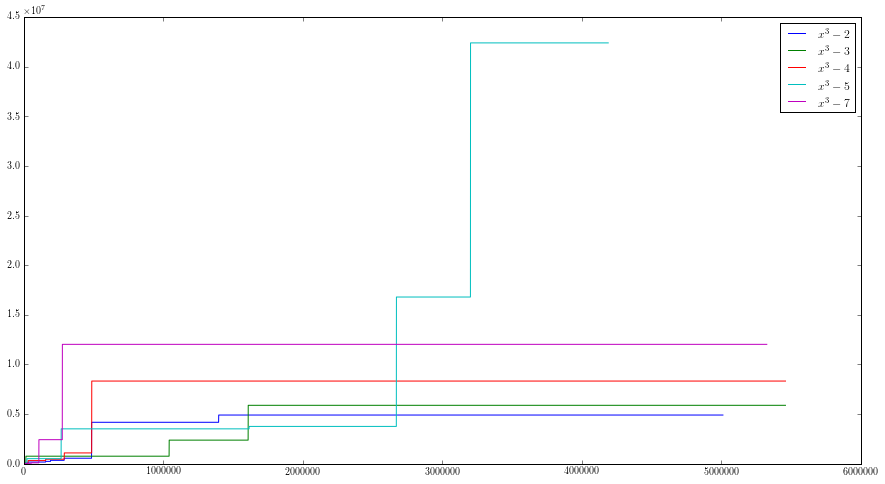

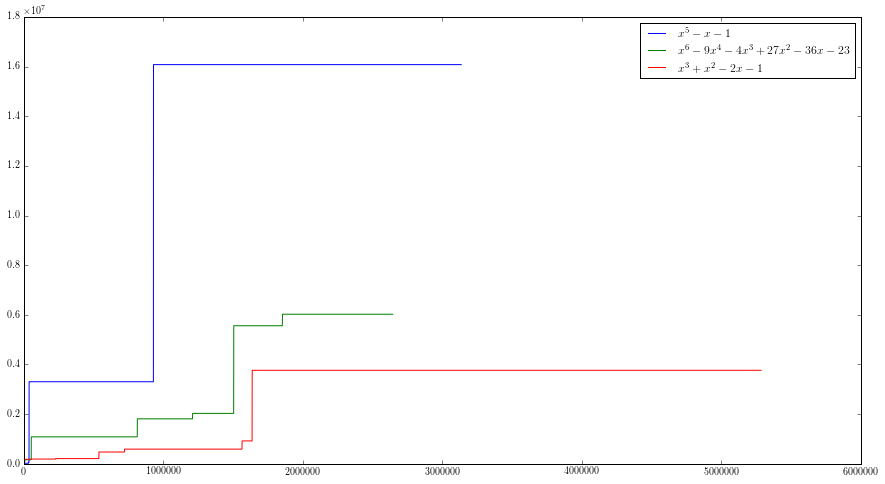

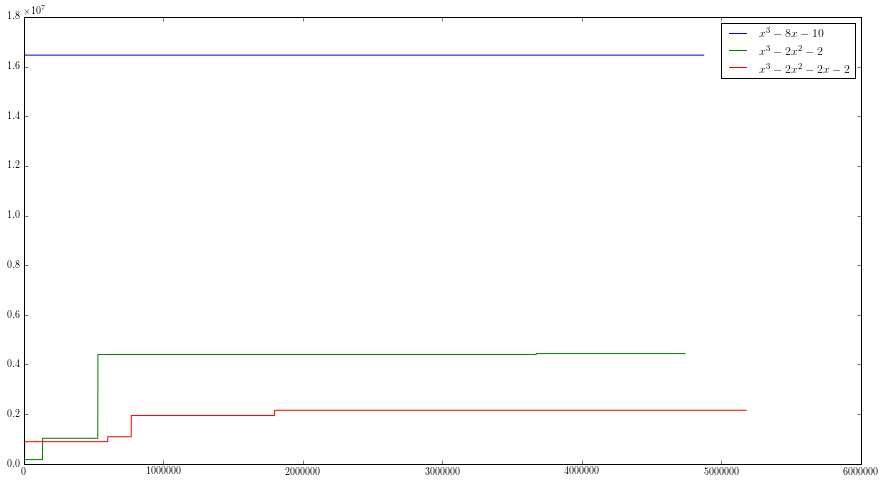

In [30]:
plot_maxes(roots)
plot_maxes(langs)
plot_maxes(bigpq)

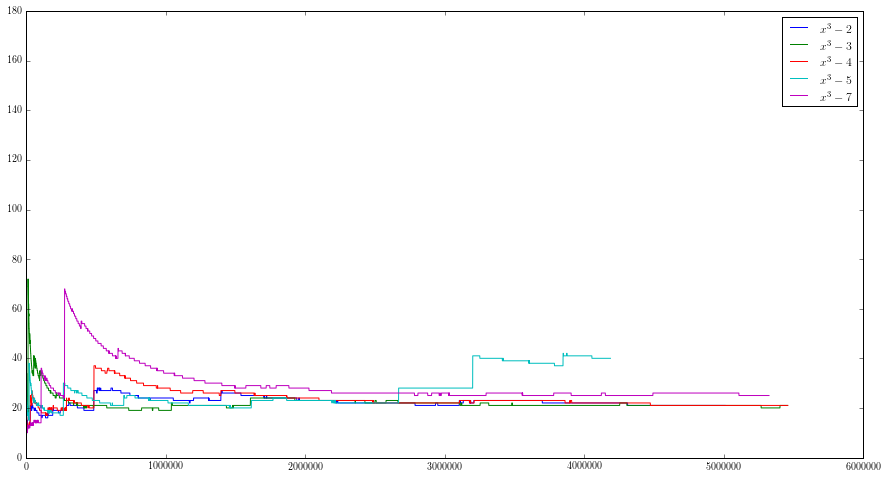

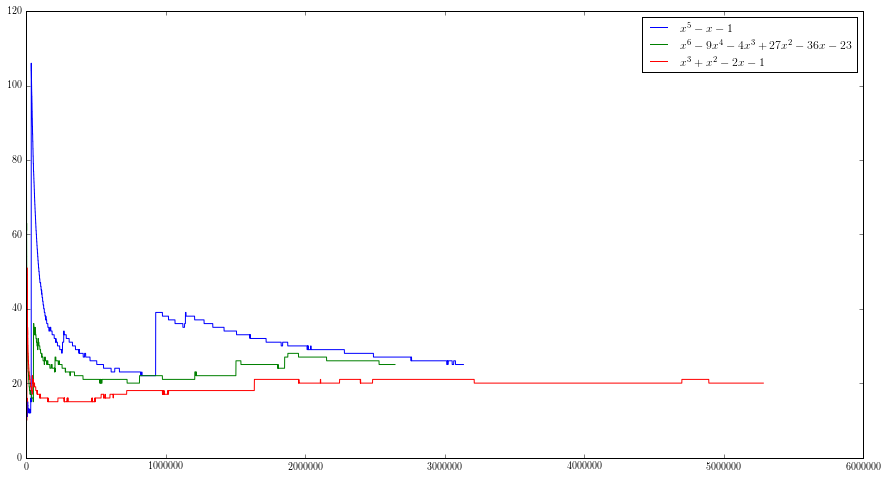

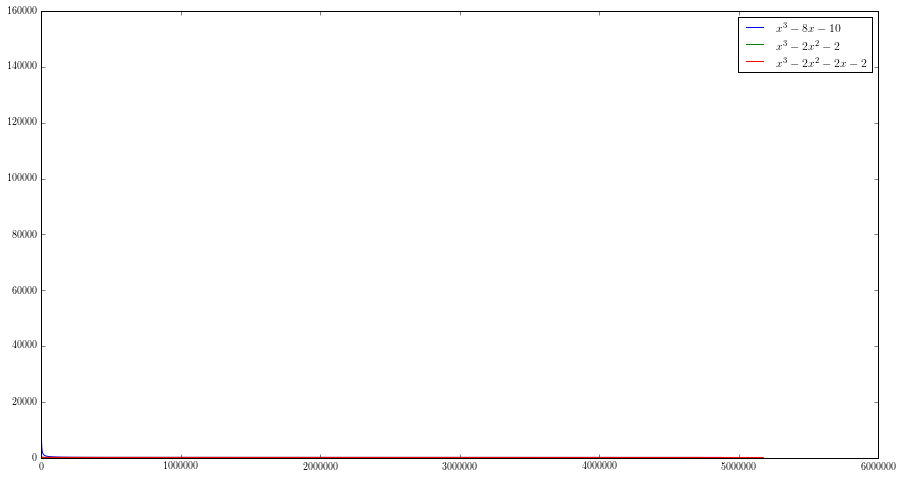

In [25]:
plot_means(roots)
plot_means(langs)
plot_means(bigpq)

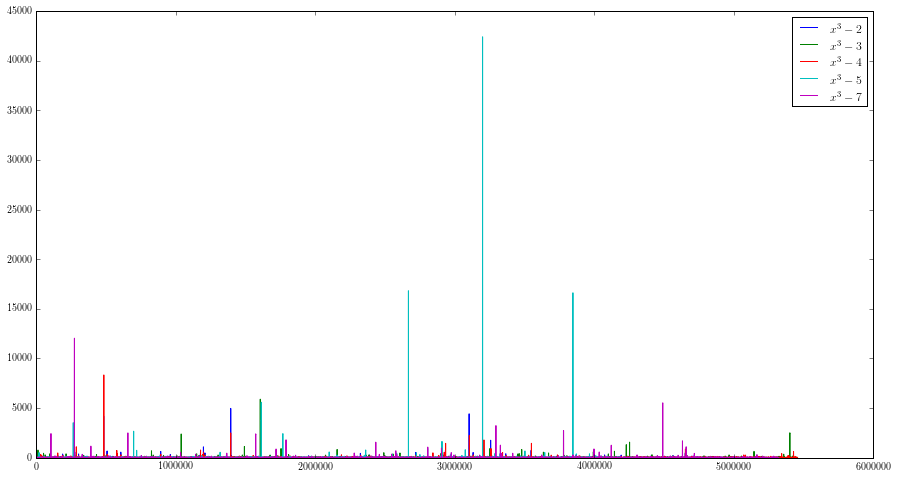

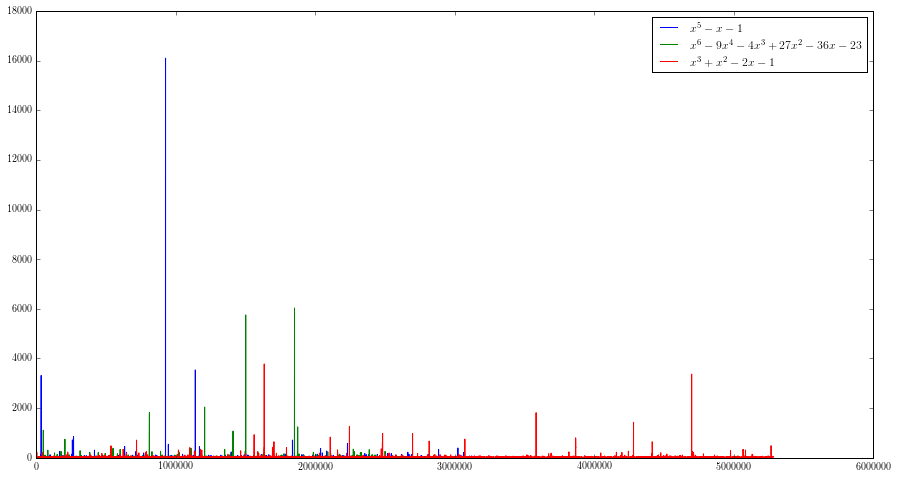

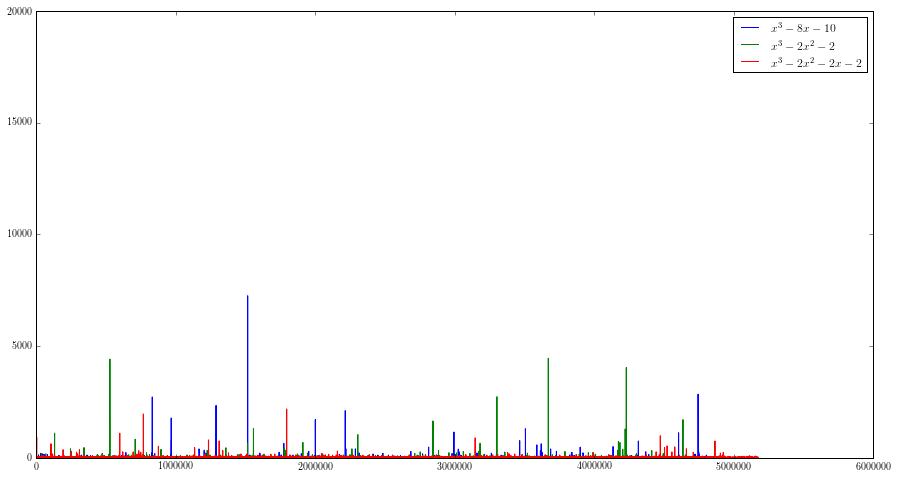

In [26]:
plot_running_means(roots)
plot_running_means(langs)
plot_running_means(bigpq)

In [41]:
from pprint import pprint
rt=most_common(roots)
lt=most_common(langs)
bt=most_common(bigpq)
export_latex_table(rt,'%0.5f',"roots_most_common")
export_latex_table(lt,'%0.5f',"langs_most_common")
export_latex_table(bt,'%0.5f',"bigs_most_common")
pprint(rt)
pprint(lt)
pprint(bt)

[[0.415094987297108,
  0.41505467541424446,
  0.4152587048546428,
  0.41504528875866137,
  0.414872113435244],
 [0.16993555752025177,
  0.1701331828793917,
  0.16981944604721108,
  0.1701326491852703,
  0.16975250451251675],
 [0.09318833609078227,
  0.09311334329235844,
  0.09323137905706032,
  0.09328751336674333,
  0.09312591405223627],
 [0.05886318596115889,
  0.058894658121810904,
  0.05891715253392828,
  0.058771890243130884,
  0.05893294283694773],
 [0.04064167067478002,
  0.040696569998177334,
  0.040608428537672346,
  0.04077981801413228,
  0.04055913143348178],
 [0.02973694136712256,
  0.029776508119108962,
  0.029793325530149413,
  0.029624212767755655,
  0.029805332694357457],
 [0.022747257352809105,
  0.022544643879366957,
  0.022662937257638786,
  0.022739996757841045,
  0.022781355324919983],
 [0.01790898223191709,
  0.017852422635136065,
  0.017919297493639307,
  0.017744971012759257,
  0.017945845292222547],
 [0.014573500150678452,
  0.01443625109566068,
  0.01444028640

In [42]:
rt=maxes_list(roots)
lt=maxes_list(langs)
bt=maxes_list(bigpq)

export_latex_table(rt,'%0i',"roots_maxes")
export_latex_table(lt,'%0i',"langs_maxes")
export_latex_table(bt,'%0i',"bigs_maxes")